<a href="https://colab.research.google.com/github/jasxn808/EPA-Stability-Analysis/blob/main/EPA_Stability_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## analyzing Expected Points Added (EPA) for QB's between 2021 and 2022 seasons for Long/Short passes

In [ ]:
pip install nfl_data_py

In [2]:
import pandas as pd
import numpy as np
import nfl_data_py as nfl

In [90]:
pbp_py = nfl.import_pbp_data([2021, 2022])

2021 done.
2022 done.
Downcasting floats.


In [91]:
##play_type == pass
#air_yards
#epa
#passer
#passing_yards

pbp_py = pbp_py.query('play_type == "pass" & air_yards.notnull()')[{'passer', 'air_yards', 'epa', 'passing_yards', 'passer_id', 'season'}].reset_index()

<ipython-input-91-64899ce11488>:7: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  pbp_py = pbp_py.query('play_type == "pass" & air_yards.notnull()')[{'passer', 'air_yards', 'epa', 'passing_yards', 'passer_id', 'season'}].reset_index()


In [92]:
pbp_py['length_cat'] = np.where(pbp_py['air_yards'] > 20, 'long', 'short')
pbp_py['passing_yards'] = np.where(pbp_py['passing_yards'].isnull(), 0, pbp_py['passing_yards'])

In [93]:
#pbp_py_short_p

pbp_py.query('length_cat == "short"')['epa'].describe()


count    34623.000000
mean         0.111205
std          1.431471
min        -13.031219
25%         -0.611945
50%         -0.017437
75%          0.946318
max          8.137274
Name: epa, dtype: float64

In [94]:
pbp_py.query('length_cat == "long"')['epa'].describe()

count    3897.000000
mean        0.350111
std         2.240231
min        -8.752355
25%        -0.866703
50%        -0.497109
75%         2.187734
max         8.357654
Name: epa, dtype: float64

In [95]:
##plotting:
import seaborn as sns
import matplotlib.pyplot as plt

pbp_py_short_p = pbp_py.query('length_cat == "short"')
pbp_py_long_p = pbp_py.query('length_cat == "long"')

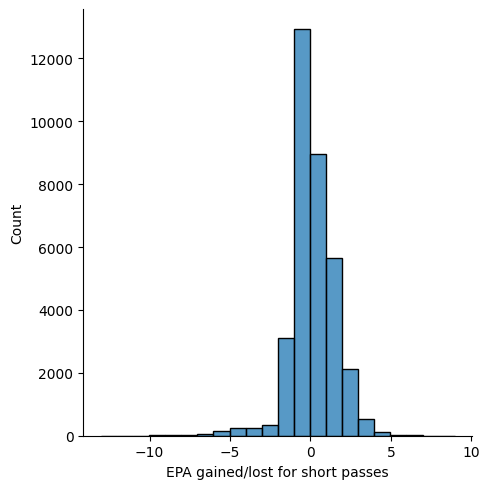

In [96]:
short_pass_hist = \
    sns.displot(data=pbp_py_short_p \
                , x = 'epa'
                , binwidth = 1
                )

short_pass_hist \
  .set_axis_labels(
      "EPA gained/lost for short passes", "Count"
  )


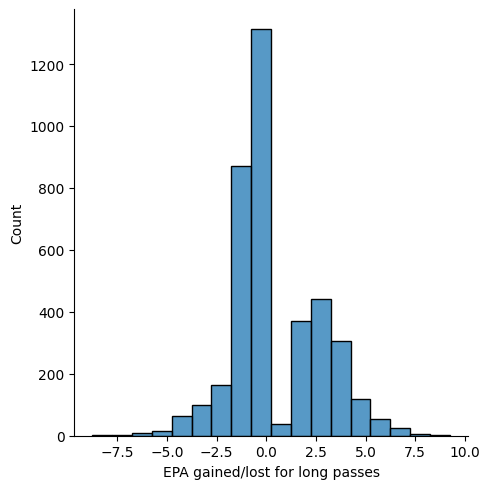

In [97]:
long_passes_hist = \
    sns.displot(data=pbp_py_long_p\
                , x='epa'
                , binwidth = 1
                )

long_passes_hist \
    .set_axis_labels (
        'EPA gained/lost for long passes', 'Count'
    )

In [158]:
## EPA Stability Analysis:
#For this problem, take the play-by-play dataframe (pbp_py or pbp_r) and then group by passer_player_name, passer_player_id, season, and pass_length.
#Then aggregate the data for passing_yards for the mean:


pbp_py_agg = \
pbp_py\
  .groupby(['passer', 'passer_id', 'season', 'length_cat'])\
  .agg({'epa': ["mean", "count"]})

epa      
                                             mean count
passer     passer_id  season length_cat                
A.Brown    00-0035676 2021   long       -0.741600     1
                             short      -0.509858     1
           00-0037175 2022   long       -0.931457     5
                             short      -0.109679    42
A.Cooper   00-0031544 2022   short      -4.980503     1
...                                           ...   ...
T.Townsend 00-0035889 2022   short      -3.517586     1
Z.Wilson   00-0037013 2021   long        0.393755    35
                             short      -0.083352   347
                      2022   long        0.028319    30
                             short       0.004653   212

[376 rows x 2 columns]

In [159]:
pbp_py_agg.columns = list(map('_'.join, pbp_py_agg.columns))
pbp_py_agg.reset_index()

,passer,passer_id,season,length_cat,epa_mean,epa_count
0,A.Brown,00-0035676,2021,long,-0.741600,1
1,A.Brown,00-0035676,2021,short,-0.509858,1
2,A.Brown,00-0037175,2022,long,-0.931457,5
3,A.Brown,00-0037175,2022,short,-0.109679,42
4,A.Cooper,00-0031544,2022,short,-4.980503,1
...,...,...,...,...,...,...
371,T.Townsend,00-0035889,2022,short,-3.517586,1
372,Z.Wilson,00-0037013,2021,long,0.393755,35
373,Z.Wilson,00-0037013,2021,short,-0.083352,347
374,Z.Wilson,00-0037013,2022,long,0.028319,30


In [161]:
pbp_py_agg.rename(columns = {'epa_mean':'epa_avg', 'epa_count':'n'}, inplace=True)

epa_avg    n
passer     passer_id  season length_cat               
A.Brown    00-0035676 2021   long       -0.741600    1
                             short      -0.509858    1
           00-0037175 2022   long       -0.931457    5
                             short      -0.109679   42
A.Cooper   00-0031544 2022   short      -4.980503    1
...                                           ...  ...
T.Townsend 00-0035889 2022   short      -3.517586    1
Z.Wilson   00-0037013 2021   long        0.393755   35
                             short      -0.083352  347
                      2022   long        0.028319   30
                             short       0.004653  212

[376 rows x 2 columns]

In [164]:
#Select only short-passing data from passers with more than 100 such plays and long-passing data for passers with more than 30 such plays:


pbp_py_agg = pbp_py_agg.query('(length_cat == "short" & n >= 100) | (length_cat == "long" & n >= 30)').reset_index()

,passer,passer_id,season,length_cat,epa_avg,n
0,A.Dalton,00-0027973,2021,short,0.059870,219
1,A.Dalton,00-0027973,2022,long,0.256287,33
2,A.Dalton,00-0027973,2022,short,0.133907,345
3,A.Rodgers,00-0023459,2021,long,0.503488,69
4,A.Rodgers,00-0023459,2021,short,0.291324,487
...,...,...,...,...,...,...
135,T.Taylor,00-0028118,2021,short,-0.074812,133
136,Z.Wilson,00-0037013,2021,long,0.393755,35
137,Z.Wilson,00-0037013,2021,short,-0.083352,347
138,Z.Wilson,00-0037013,2022,long,0.028319,30


In [204]:
epa_cy = pbp_py_agg.copy()

epa_ly = epa_cy.copy()
epa_ly['season'] += 1
epa_ly.rename(columns = {'epa_avg':'epa_avg_LY'}, inplace=True)


,passer,passer_id,season,length_cat,epa_avg,n
0,A.Dalton,00-0027973,2021,short,0.059870,219
1,A.Dalton,00-0027973,2022,long,0.256287,33
2,A.Dalton,00-0027973,2022,short,0.133907,345
3,A.Rodgers,00-0023459,2021,long,0.503488,69
4,A.Rodgers,00-0023459,2021,short,0.291324,487
...,...,...,...,...,...,...
135,T.Taylor,00-0028118,2021,short,-0.074812,133
136,Z.Wilson,00-0037013,2021,long,0.393755,35
137,Z.Wilson,00-0037013,2021,short,-0.083352,347
138,Z.Wilson,00-0037013,2022,long,0.028319,30


In [210]:
epa_both = \
epa_cy\
  .merge(epa_ly\
         ,how='left'\
         ,on=['passer', 'passer_id','season', 'length_cat']\
         ).fillna(0)

,passer,passer_id,season,length_cat,epa_avg,n_x,epa_avg_LY,n_y
0,A.Dalton,00-0027973,2021,short,0.059870,219,0.000000,0.0
1,A.Dalton,00-0027973,2022,long,0.256287,33,0.000000,0.0
2,A.Dalton,00-0027973,2022,short,0.133907,345,0.059870,219.0
3,A.Rodgers,00-0023459,2021,long,0.503488,69,0.000000,0.0
4,A.Rodgers,00-0023459,2021,short,0.291324,487,0.000000,0.0
...,...,...,...,...,...,...,...,...
135,T.Taylor,00-0028118,2021,short,-0.074812,133,0.000000,0.0
136,Z.Wilson,00-0037013,2021,long,0.393755,35,0.000000,0.0
137,Z.Wilson,00-0037013,2021,short,-0.083352,347,0.000000,0.0
138,Z.Wilson,00-0037013,2022,long,0.028319,30,0.393755,35.0


In [221]:
epa_both.query('passer == "J.Burrow"')[['passer','season', 'length_cat', 'epa_avg','epa_avg_LY']].sort_values(['passer', 'season','length_cat'])

,passer,season,length_cat,epa_avg,epa_avg_LY
45,J.Burrow,2021,long,0.919713,0.000000
46,J.Burrow,2021,short,0.247156,0.000000
47,J.Burrow,2022,long,0.740895,0.919713
48,J.Burrow,2022,short,0.214243,0.247156


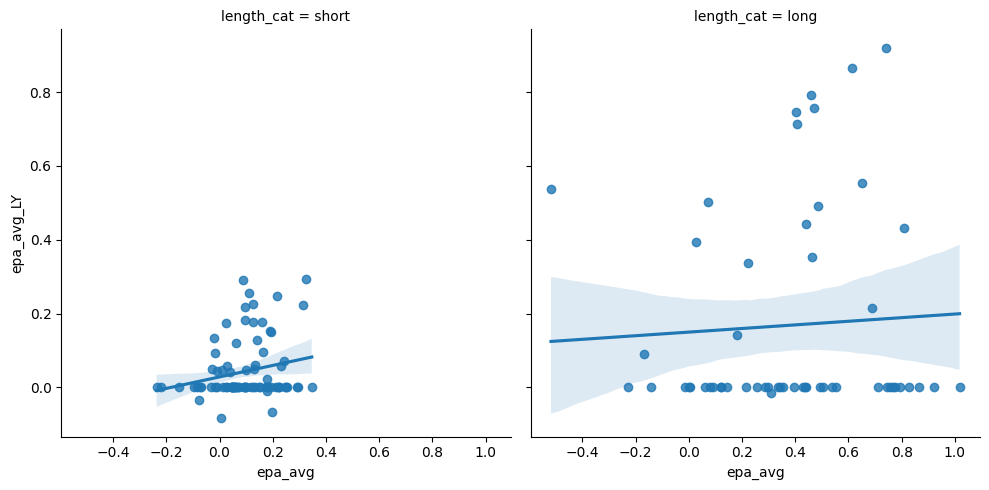

In [229]:
#scatterplot:

sns.lmplot(\
    data = epa_both\
    , x='epa_avg'\
    , y='epa_avg_LY'\
    , col = 'length_cat'
)


In [230]:
#Pearson’s correlation coefficient calc:

epa_both \
    .groupby('length_cat')[['epa_avg', 'epa_avg_LY']]\
    .corr()

epa_avg  epa_avg_LY
length_cat                                 
long       epa_avg     1.000000    0.056551
           epa_avg_LY  0.056551    1.000000
short      epa_avg     1.000000    0.219107
           epa_avg_LY  0.219107    1.000000

In [ ]:
# "
#A Pearson’s correlation coefficient can vary from –1 to 1.
#In the case of stability, a number closer to +1 implies strong, positive correlations and
#more stability, and a number closer to 0 implies weak correlations at best (and an unstable measure).
#A Pearson’s correlation coefficient of –1 implies a decreasing correlation and does not exist for stability
#but would mean a high value this year would be correlated with a low value next year.
# "

In [237]:
epa_both.query('passer=="R.Wilson"')

,passer,passer_id,season,length_cat,epa_avg,n_x,epa_avg_LY,n_y
107,R.Wilson,00-0029263,2021,long,0.756220,68,0.000000,0.0
108,R.Wilson,00-0029263,2021,short,0.045852,332,0.000000,0.0
109,R.Wilson,00-0029263,2022,long,0.470927,75,0.756220,68.0
110,R.Wilson,00-0029263,2022,short,0.009241,407,0.045852,332.0
